# 모두를 위한 딥러닝 시즌2 - TensorFlow

## LAB09 - 1 Neural nets XOR

XOR문제를 로지스틱 회귀를 이용해 풀기

Logistic regression을 두 개 쌓아서 만든게 뉴럴넷   
시그모이드가 가지고 있는 단점을 보완하는 렐루!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)

print(tf.__version__)

2.5.0


x_data는 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data의 0과 1을 구분하는 예제.

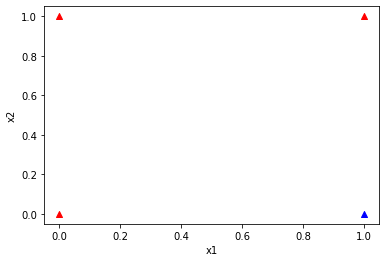

In [2]:
x_data = [[0,0],
         [0,1],
         [1,0],
         [1,1]]
y_data = [[0],
         [1],
         [1],
         [0]]

plt.scatter(x_data[0][0], x_data[0][1], c= 'red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c= 'red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c= 'red', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c= 'blue', marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

위 데이터를 기준으로 XOR처리를 위한 모델을 만든다.
- tensorflow data API 를 통해 학습시킬 값들을 담는다. (Batch Size는 한 번에 학습시킬 Size로 정한다.)
- preprocess function으로 features, labels는 실재학습에 쓰일 Data연산을 위해 Type를 맞춰준다.

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data (features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

## 1. Logistci Regression으로 XOR 모델 만들어보기
W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias.

In [5]:
W = tf.Variable(tf.zeros((2,1)),name = 'weight')
b = tf.Variable(tf.zeros((1,)), name = 'bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


### 시그모이드 함수를 가설로 선언
- sigmoid는 0과 1의 값 만을 리턴한다.

In [10]:
#logistic_regression 정의하기
def logistic_regression(features):
    hypothesis = tf.divide(1.,1.+tf.exp(tf.matmul(features, W)+b))
    return hypothesis

In [11]:
#loss 함수 정의하기 
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels*tf.math.log(logistic_regression(features))+(1-labels)*tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

추론한 값은 0.5를 기준으로 0과 1의 값을 리턴

In [15]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis>0.5, dtype = tf.float32) #tf.cast():조건에 따라 0또는 1반환
    accuracy = tf.reduce_mean(tf.cast(tf.math.equal(predicted, labels), dtype = tf.float32))
    return accuracy

GradientTape를 통해 경사값 계산

In [16]:
#경사하강
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn (logistic_regression(features), features, labels)
        return tape.gradient(loss_value, [W,b])

### Tensorflow 실행을 위한 Session 선언

In [21]:
EPOCHS = 1000

for step in range(EPOCHS+1):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000
